In [1]:
# Import Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import random as rd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

np.random.seed(42)
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
X=np.load("X.npy")
y=np.load("Y.npy")

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (2062, 64, 64)
y shape: (2062, 10)


In [3]:
def decode_OneHotEncoding(label):
    label_new=list()
    for target in label:
        label_new.append(np.argmax(target))
    label=np.array(label_new)
    return label


def correct_mismatches(label):
    label_map={0:9,1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}
    label_new=list()
    for s in label:
        label_new.append(label_map[s])
    label_new=np.array(label_new)
    return label_new

def show_image_classes(image, label, n=10):
    label=decode_OneHotEncoding(label)
    label=correct_mismatches(label)
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):

            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index], cmap='gray')
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Sign :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} Sample for Each Classes".format(n))
    plt.show()

In [4]:
number_of_pixels=X.shape[1]*X.shape[2]
number_of_classes=y.shape[1]
print('SUMMARY of the DATASET:')
print("an image size:{}x{}".format(X.shape[1], X.shape[2]))
print("number of pixels:",number_of_pixels)
print("number of classes:",number_of_classes)

y_decoded=decode_OneHotEncoding(y.copy())
sample_per_class=np.unique(y_decoded, return_counts=True)
print("Number of Samples:{}".format(X.shape[0]))
for sign, number_of_sample in zip(sample_per_class[0], sample_per_class[1]):
    print("  {} sign has {} samples.".format(sign, number_of_sample))

SUMMARY of the DATASET:
an image size:64x64
number of pixels: 4096
number of classes: 10
Number of Samples:2062
  0 sign has 204 samples.
  1 sign has 205 samples.
  2 sign has 206 samples.
  3 sign has 207 samples.
  4 sign has 206 samples.
  5 sign has 208 samples.
  6 sign has 207 samples.
  7 sign has 206 samples.
  8 sign has 206 samples.
  9 sign has 207 samples.


The dataset consists of images with one-handed display of digits 0 to 9 in sign language. The images are 64X64 in size and gray in color. It was obtained by 218 people making 10 different signs once. There should be a total of 2180 samples, while there are 2062 samples in the data set. This is probably because some unfavorable images have been removed by creator of the dataset.

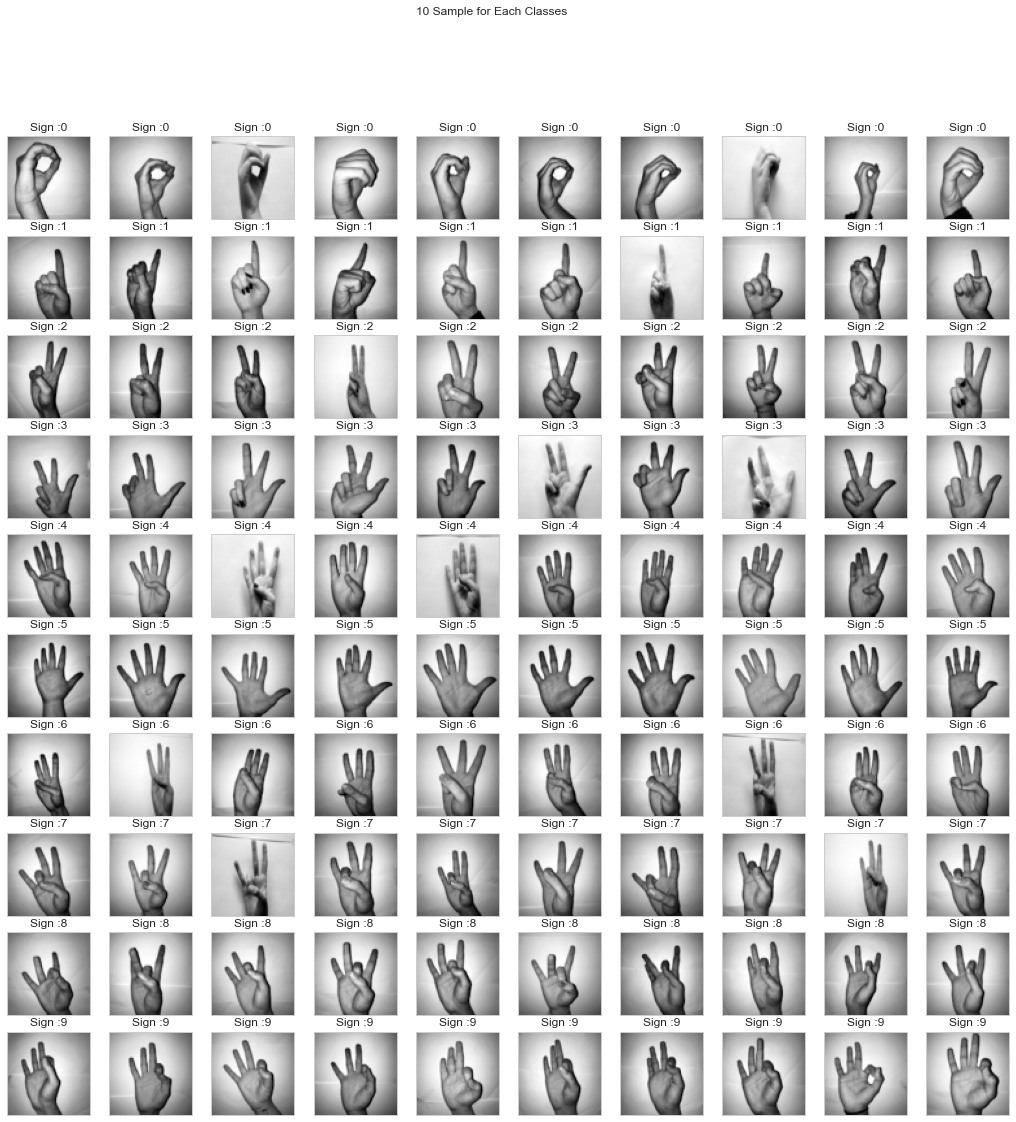

In [5]:
show_image_classes(image=X, label=y.copy())

In [6]:
X_flat = X.reshape(2062, 64*64)
array = np.concatenate((X_flat, y_decoded.reshape(len(y_decoded), 1)), axis = 1)
array.shape

(2062, 4097)

In [7]:
mask = (array[:, -1] == 0)|(array[:, -1] == 1)
newarray = array[mask]
newarray.shape

(409, 4097)

In [8]:
X = newarray[:,:-1]
Y = newarray[:, -1].reshape(newarray.shape[0], 1)
print(X.shape)
print(Y.shape)

(409, 4096)
(409, 1)


In [9]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [10]:
print("X train:",X_train.shape)
print("X test:",X_test.shape)

X train: (347, 4096)
X test: (62, 4096)


In [11]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 347)
x test:  (4096, 62)
y train:  (1, 347)
y test:  (1, 62)


In [12]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [13]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [14]:
y_head = sigmoid(0)
y_head

0.5

In [15]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

In [16]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [17]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [18]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 13.700572
Cost after iteration 10: 2.386122
Cost after iteration 20: 2.364705
Cost after iteration 30: 2.083520
Cost after iteration 40: 1.783522
Cost after iteration 50: 1.484855
Cost after iteration 60: 1.179679
Cost after iteration 70: 0.833408
Cost after iteration 80: 0.375049
Cost after iteration 90: 0.167458
Cost after iteration 100: 0.162014
Cost after iteration 110: 0.158255
Cost after iteration 120: 0.154713
Cost after iteration 130: 0.151367
Cost after iteration 140: 0.148202


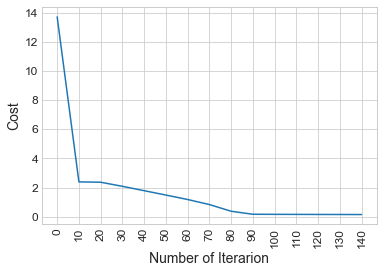

train accuracy: 96.54178674351584 %
test accuracy: 91.93548387096774 %


In [19]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [20]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9516129032258065 
train accuracy: 1.0 


In [30]:
y_pred=(logreg.predict(x_test.T)).T.reshape(1, 62)
y_pred.shape

(1, 62)

In [34]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()

In [35]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[31,  2],
       [ 1, 28]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

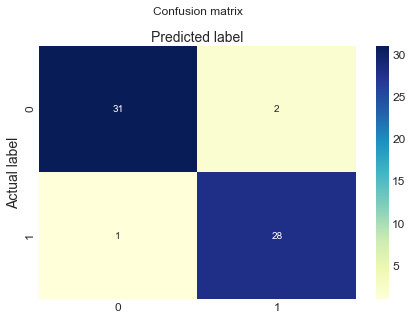

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9516129032258065
Precision: 0.9333333333333333
Recall: 0.9655172413793104


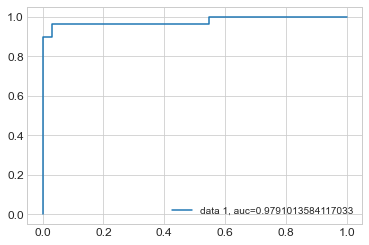

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()